In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, \
    pairwise_distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
df = pd.read_csv('data\\data_lab1_змодельовані\\agglo.txt', delimiter='\t', header=None)

df[['col1', 'col2']] = df[0].str.split(expand=True)

df = df.drop(columns=[0])

df['col1'] = df['col1'].astype(float)
df['col2'] = df['col2'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    6 non-null      float64
 1   col2    6 non-null      float64
dtypes: float64(2)
memory usage: 228.0 bytes


In [72]:
X = df.copy()
# test_df['y_kmeans'] = 1
X

,col1,col2
0,29.0,24.0
1,29.0,32.0
2,30.0,25.0
3,30.0,35.0
4,28.0,27.0
5,31.0,33.0


In [73]:
def init_clusters(X):
    N = X.shape[0]
    labels = []
    for i in range(N):
        labels.append([i])
    return labels


def init_matrix(X):
    N = X.shape[0]
    matrix = []
    for l in range(N):
        row = []
        for h in range(N):
            euclidean_distance = np.linalg.norm(X[l] - X[h])
            row.append(euclidean_distance)
        matrix.append(row)
    return np.array(matrix)


def find_nearest_clusters(matrix):
    min_elem = matrix[0, 1]
    index1 = 0
    index2 = 0
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[0]):
            if matrix[i, j] != 0 and matrix[i, j] < min_elem:
                min_elem = matrix[i, j]
                index1 = i
                index2 = j
    return np.array([index1, index2])


def update_clusters(nearest_clusters, clusters):
    combined_cluster = clusters[nearest_clusters[0]] + clusters[nearest_clusters[1]]
    clusters[nearest_clusters[0]] = combined_cluster
    del clusters[nearest_clusters[1]]
    return clusters


def update_matrix(matrix, nearest_clusters):
    new_matrix = matrix.copy()

    index1 = nearest_clusters[0]
    index2 = nearest_clusters[1]
    alpha = 0.5

    for i in range(new_matrix.shape[0]):
        if index1 == i:
            new_matrix[i, index1] = 0
        else:
            new_matrix[i, index1] = alpha * (matrix[i, index1] + matrix[i, index2])

    for j in range(new_matrix.shape[1]):
        new_matrix[index1, j] = new_matrix[j, index1]

    new_matrix = np.delete(new_matrix, index2, axis=0)
    new_matrix = np.delete(new_matrix, index2, axis=1)

    return new_matrix

def assign_labels_to_objects(X, clusters):
    labels = []
    for i in range(X.shape[0]):
        for j, cluster in enumerate(clusters):
            if i in cluster:
                labels.append(j)
    return labels
        
    
# def find_nearest_clusters(matrix):
#     mask = np.ma.masked_where(matrix == 0, matrix)
#     min_values = np.min(mask, axis=0)
#     min_value = np.min(min_values)
#     argmins = []
#     for i in range(min_values.shape[0]):
#         if min_values[i] == min_value:
#             argmins.append(i)
#     return np.array(argmins)
        

def agglomerative_clustering(X, n_clusters):
    clusters = init_clusters(X)
    print(clusters)
    matrix = init_matrix(X)
    # print(matrix)
    for _ in range(n_clusters, X.shape[0]):
        nearest_clusters = find_nearest_clusters(matrix)
        print(nearest_clusters)
        clusters = update_clusters(nearest_clusters, clusters)
        print(clusters)
        matrix = update_matrix(matrix, nearest_clusters)
        print(matrix)
    labels = assign_labels_to_objects(X,clusters)
    return labels



In [74]:
df_labels = agglomerative_clustering(X.values, n_clusters=2)
df["y_agglo"] = df_labels

[[0], [1], [2], [3], [4], [5]]
[0 2]
[[0, 2], [1], [3], [4], [5]]
[[ 0.          7.53553391 10.52268051  2.99535239  8.6409011 ]
 [ 7.53553391  0.          3.16227766  5.09901951  2.23606798]
 [10.52268051  3.16227766  0.          8.24621125  2.23606798]
 [ 2.99535239  5.09901951  8.24621125  0.          6.70820393]
 [ 8.6409011   2.23606798  2.23606798  6.70820393  0.        ]]
[1 4]
[[0, 2], [1, 5], [3], [4]]
[[ 0.          8.0882175  10.52268051  2.99535239]
 [ 8.0882175   0.          2.69917282  5.90361172]
 [10.52268051  2.69917282  0.          8.24621125]
 [ 2.99535239  5.90361172  8.24621125  0.        ]]
[1 2]
[[0, 2], [1, 5, 3], [4]]
[[0.         9.30544901 2.99535239]
 [9.30544901 0.         7.07491149]
 [2.99535239 7.07491149 0.        ]]
[0 2]
[[0, 2, 4], [1, 5, 3]]
[[0.         8.19018025]
 [8.19018025 0.        ]]


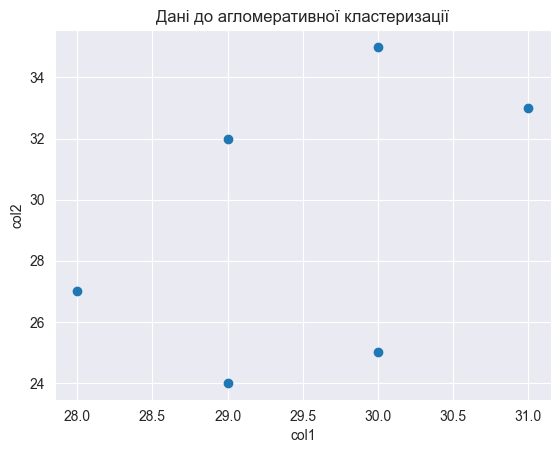

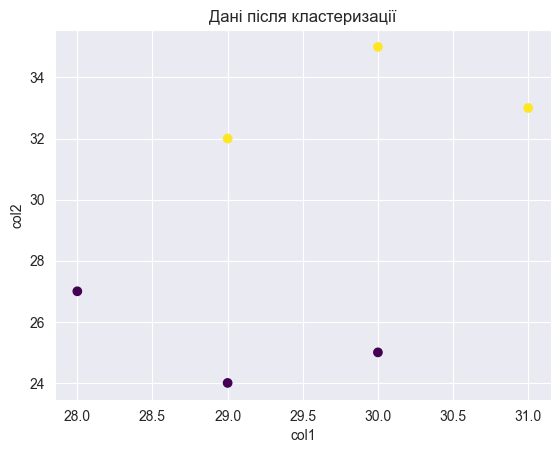

In [75]:

plt.scatter(df['col1'], df['col2'])
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані до агломеративної кластеризації')
plt.show()

plt.scatter(df['col1'], df['col2'], c=df['y_agglo'],cmap='viridis')
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані після кластеризації')
plt.show()